In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
len(words)

32033

In [10]:
alphabet = list('.abcdefghijklmnopqrstuvwxyz')
s2i = {c: i for i, c in enumerate(alphabet)}
i2s = {i: c for i, c in enumerate(alphabet)}

In [110]:
size, ctx, X, Y = 3, [0]*size, [], []
for w in words:
  for ch in w + ".":
    X.append(ctx)
    Y.append(s2i[ch])
    ctx = ctx[1:] + [s2i[ch]]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [48]:
X.shape

torch.Size([32, 3])

In [53]:
C = torch.randn((27, 2))
C.shape

torch.Size([27, 2])

In [59]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [79]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [80]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [81]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [86]:
logits = h @ W2 + b2

In [92]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [97]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(14.3605)

In [177]:
C = torch.randn(27,2)
W1 = torch.randn(6,100)
b1 = torch.randn(100)
W2 = torch.randn(100,27)
b2 = torch.randn(27)
params = [C, W1, b1, W2, b2]
for p in params:
  p.requires_grad = True

In [199]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lri, lossi = [], []
for i in range(10000):
  # mini batch
  ix = torch.randint(0, X.shape[0], (32,))
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1,6) @ W1+b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  for p in params:
    p.grad = None
  
  loss.backward()

  # lr = lrs[i]
  lr = 0.01
  for p in params:
    p.data += -lr * p.grad
  lri.append(lr)
  lossi.append(loss.item())
  
print(loss.item())

2.249605894088745


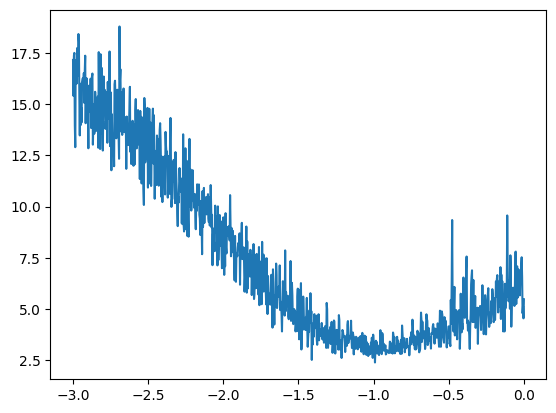

In [181]:
plt.plot(lre, lossi)

In [201]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1+b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3094, grad_fn=<NllLossBackward0>)

In [ ]:
# training split (80%)
# validation split (10%)
# testing split (10%)